In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import exists
from shutil import copy

In [2]:
def moving_average(arr, n=1):
    return np.convolve(arr, np.ones(n), 'valid') / n

In [3]:
destination = "/home/bufi/Python/Vorlesungen/Fundamentals of ML/Final Project Files/"
title = "vietnam symmetry 25"
file = destination+title+".csv"
if not exists(destination+title+".csv"):
    copy("agent_code/my_agent/data.csv", file)

In [4]:
df = pd.read_csv(file, index_col="round")
df

,score,survival time,total rewards
round,,,
1,1,27,-60
2,1,4,10
3,0,15,-135
4,0,6,-135
5,0,31,-250
6,4,90,680
7,20,200,2580
8,12,91,1275
9,19,154,2230


In [5]:
avgdf = df.apply(moving_average, axis=0)

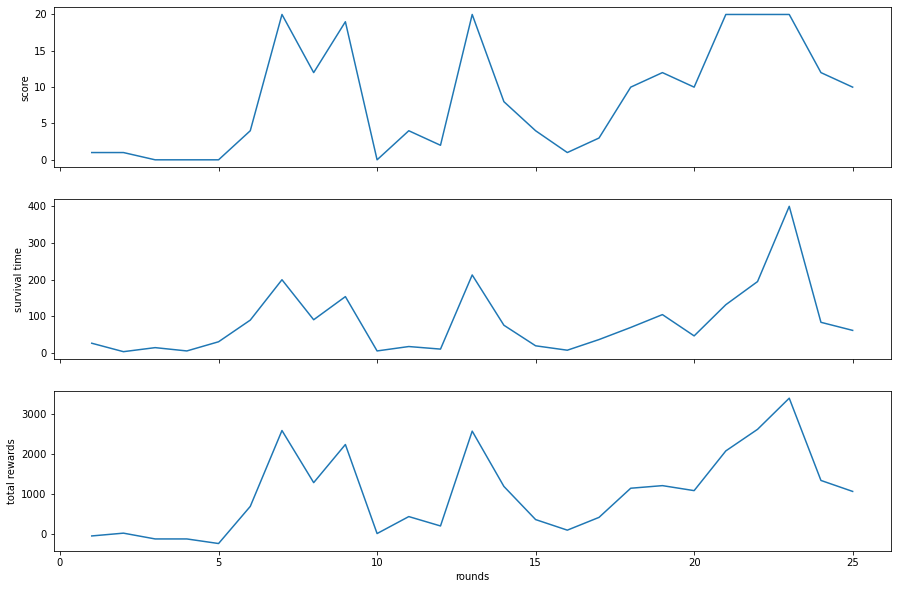

In [6]:
fig, [ax1, ax2, ax3] = plt.subplots(3,1, figsize=(15,10), sharex=True)
ax1.plot(avgdf['score'])
ax1.set_ylabel("score")
ax2.plot(avgdf['survival time'])
ax2.set_ylabel("survival time")
ax3.plot(avgdf['total rewards'])
ax3.set_ylabel("total rewards")
ax3.set_xlabel("rounds")
plt.savefig(destination + title + ".png")

In [7]:
avgdf.corr()

,score,survival time,total rewards
score,1.000000,0.843377,0.973654
survival time,0.843377,1.000000,0.928629
total rewards,0.973654,0.928629,1.000000


Text(0.5, 1.0, 'Distribution of Distances for the different features')

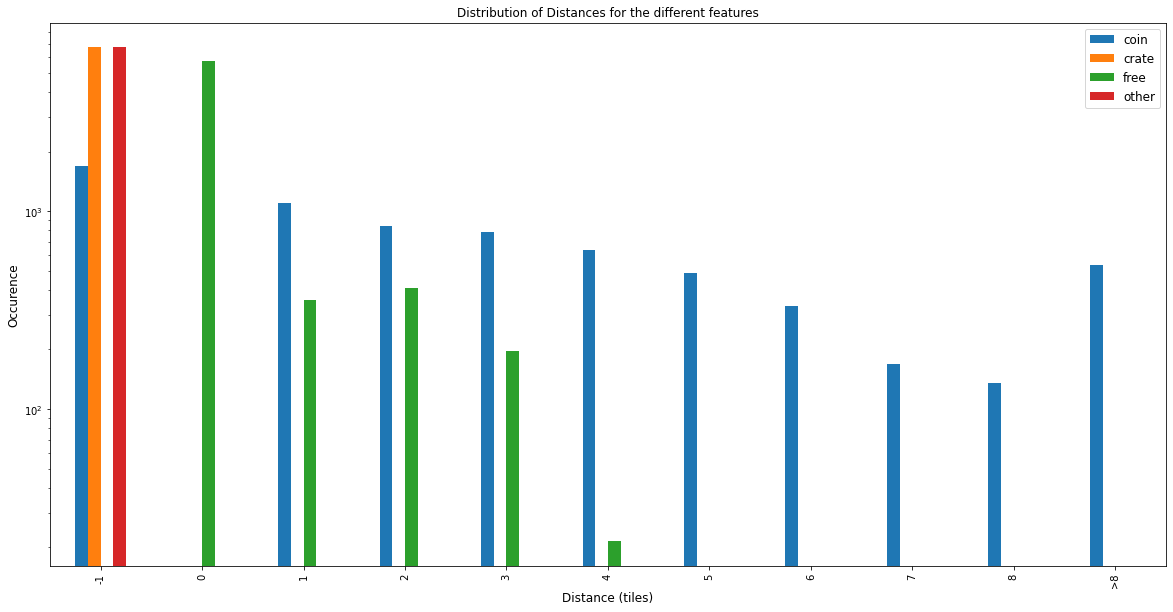

In [8]:
bindf = pd.read_csv("agent_code/my_agent/bincount.csv", header=[0,1])
ax = bindf.mean().unstack(level=-1).plot.bar(figsize=(20,10), stacked=False)
ax.set_yscale('log')
ax.set_xlabel('Distance (tiles)', fontsize='large')
ax.set_ylabel('Occurence', fontsize='large')
ax.legend(fontsize='large')
ax.set_title("Distribution of Distances for the different features")